<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    72.341750  52.283821  43.027349  -7.620739  170.032181   
      1.0    85.450017  47.765168  80.146729  -0.134966  223.226949   
      2.0    90.911747  81.320790  49.851172  10.958072  243.041780   
      3.0    30.448972  65.882782  48.418105  11.291660  166.041519   
      4.0    92.055302  46.794606  89.168425  -2.622436  235.395896   
...                ...        ...        ...        ...         ...   
999.0 25.0   33.746428  47.764821  55.626744  -0.893698  146.244295   
      26.0   97.187365  21.116072  49.348429   0.782270  178.434136   
      27.0   47.606113  44.399782  55.404891  -0.227641  157.183145   
      28.0   91.308577  24.775229  72.051684  -1.215398  196.920091   
      29.0   55.862721  41.489048  32.172638   6.834103  146.358510   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.714238  -8.682056  
      1.0    221.936718   1.290231  
      2.0    231.574858  11.466922  
      3.0    156.594692   9.446826  
      4.0    235.875040  -0.479143  
...                 ...        ...  
999.0 25.0   144.804699   1.439596  
      26.0   177.440951   0.993185  
      27.0   155.634088   1.549056  
      28.0   197.527355  -0.607264  
      29.0   138.303221   8.055289  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    72.341750  52.283821  43.027349  -7.620739  170.032181   
      1.0    85.450017  47.765168  80.146729  -0.134966  223.226949   
      2.0    90.911747  81.320790  49.851172  10.958072  243.041780   
      3.0    30.448972  65.882782  48.418105  11.291660  166.041519   
      4.0    92.055302  46.794606  89.168425  -2.622436  235.395896   
...                ...        ...        ...        ...         ...   
999.0 25.0   33.746428  47.764821  55.626744  -0.893698  146.244295   
      26.0   97.187365  21.116072  49.348429   0.782270  178.434136   
      27.0   47.606113  44.399782  55.404891  -0.227641  157.183145   
      28.0   91.308577  24.775229  72.051684  -1.215398  196.920091   
      29.0   55.862721  41.489048  32.172638   6.834103  146.358510   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.714238  -8.682056  
      1.0    221.936718   1.290231  
      2.0    231.574858  11.466922  
      3.0    156.594692   9.446826  
      4.0    235.875040  -0.479143  
...                 ...        ...  
999.0 25.0   144.804699   1.439596  
      26.0   177.440951   0.993185  
      27.0   155.634088   1.549056  
      28.0   197.527355  -0.607264  
      29.0   138.303221   8.055289  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    72.341750  52.283821  43.027349  -7.620739  170.032181   
      1.0    85.450017  47.765168  80.146729  -0.134966  223.226949   
      2.0    90.911747  81.320790  49.851172  10.958072  243.041780   
      3.0    30.448972  65.882782  48.418105  11.291660  166.041519   
      4.0    92.055302  46.794606  89.168425  -2.622436  235.395896   
...                ...        ...        ...        ...         ...   
999.0 25.0   33.746428  47.764821  55.626744  -0.893698  146.244295   
      26.0   97.187365  21.116072  49.348429   0.782270  178.434136   
      27.0   47.606113  44.399782  55.404891  -0.227641  157.183145   
      28.0   91.308577  24.775229  72.051684  -1.215398  196.920091   
      29.0   55.862721  41.489048  32.172638   6.834103  146.358510   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.714238  -8.682056  
      1.0    221.936718   1.290231  
      2.0    231.574858  11.466922  
      3.0    156.594692   9.446826  
      4.0    235.875040  -0.479143  
...                 ...        ...  
999.0 25.0   144.804699   1.439596  
      26.0   177.440951   0.993185  
      27.0   155.634088   1.549056  
      28.0   197.527355  -0.607264  
      29.0   138.303221   8.055289  

[30000 rows x 7 columns]

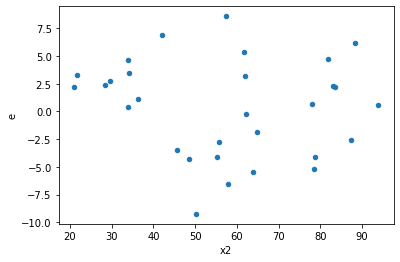

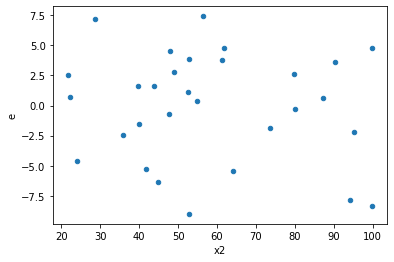

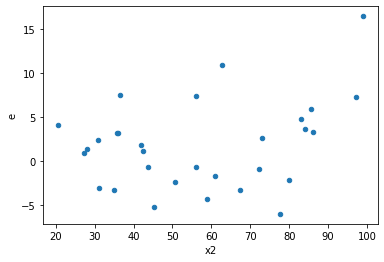

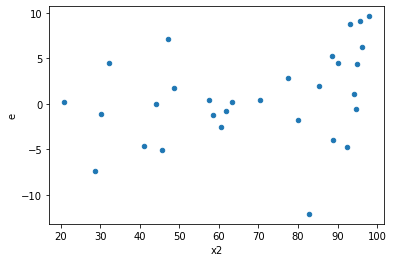

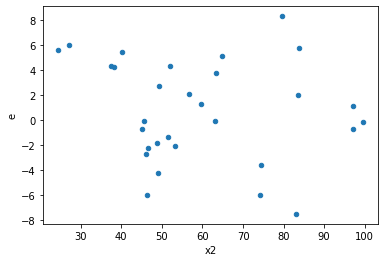

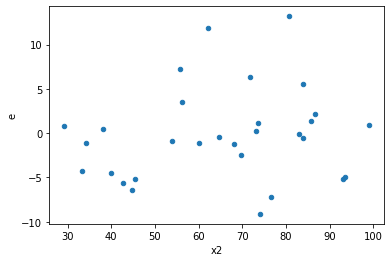

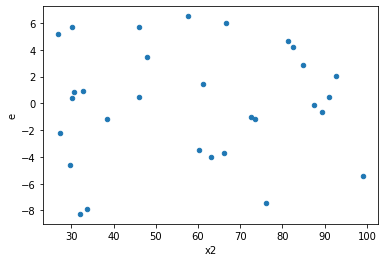

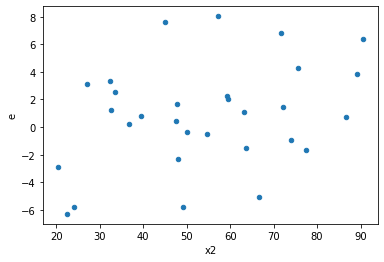

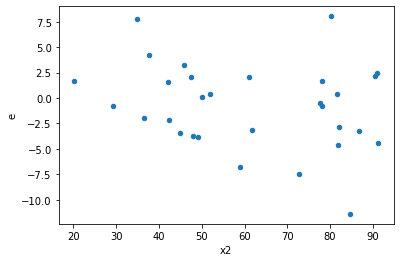

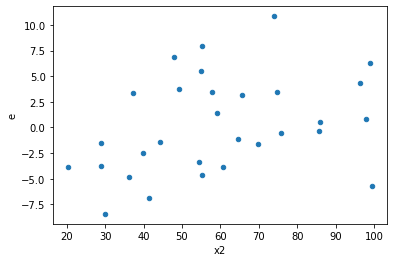

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,9.0,136.3436838783374,242.68998014849916,15.149298208704156,26.96555334983324,1.7799869656232628,0.4033192872616147,0.7983403563691926,0.20165964363080735,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,118.97916132674975,255.04387783123698,13.219906814083306,28.33820864791522,2.1436012406476443,0.27142411478092865,0.8642879426095357,0.13571205739046432,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,203.50021450383443,326.8448294498792,22.611134944870493,36.31609216109769,1.6061154050710875,0.4913294684440952,0.7543352657779524,0.2456647342220476,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,143.13892448894651,330.52531943690275,15.90432494321628,36.72503549298919,2.309122557801715,0.2284609264516746,0.8857695367741627,0.1142304632258373,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,292.8065346707988,419.30763845580645,32.53405940786653,46.589737606200714,1.4320296469039953,0.6012834121552797,0.6993582939223602,0.30064170607763985,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,137.02854825644843,206.04309607894245,15.225394250716493,22.893677342104716,1.50365087203094,0.5530930265356211,0.7234534867321895,0.27654651326781055,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,141.7869782619009,257.80161734123203,15.754108695766767,28.64462414902578,1.818231973778547,0.3864380665581648,0.8067809667209176,0.1932190332790824,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,95.15877784160591,219.93549994495083,10.573197537956212,24.437277771661204,2.3112476319424657,0.2279634993493569,0.8860182503253216,0.11398174967467845,Reject005=1 : Homoscedasticity
15.0,9.0,9.0,83.30856085945469,393.5343055015528,9.256506762161631,43.72603394461698,4.7238159132944695,0.03018783805646552,0.9849060809717672,0.01509391902823276,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,293.29168431652613,182.25809696953092,32.58796492405846,20.250899663281213,0.6214226543594547,0.4895861082007843,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,136.3436838783374,242.68998014849916,15.149298208704156,26.96555334983324,1.7799869656232628,0.4033192872616147,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,272.6281065973006,225.5959696329315,30.29201184414451,25.066218848103503,0.8274861035005451,0.7824877745800148,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,480.47140026795955,430.1388147273909,53.385711140884396,47.79320163637677,0.8952433266319326,0.8717694266692892,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,118.97916132674975,255.04387783123698,13.219906814083306,28.33820864791522,2.1436012406476443,0.27142411478092865,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,203.50021450383443,326.8448294498792,22.611134944870493,36.31609216109769,1.6061154050710875,0.4913294684440952,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,143.13892448894651,330.52531943690275,15.90432494321628,36.72503549298919,2.309122557801715,0.2284609264516746,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,326.5542012287981,154.10818282144174,36.283800136533124,17.123131424604637,0.47192221763353404,0.2785870594048496,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,655.9041191946973,65.0333734172621,72.87823546607747,7.2259303796957886,0.09915073181291871,0.0020160300061375456,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      906
Reject005=0 : Heteroscedasticity     94
Name: Result_test, dtype: int64